In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [44]:
confirmed_world = confirmed_data_df.sum()
print('Total Cases Worldwide:')
print(confirmed_world)
# confirmed_world.rename('World')
deaths_world = deaths_data_df.sum()
print('Total Deaths Worldwide:')
print(deaths_world)
# deaths_world.rename('World')
recovered_world = recovered_data_df.sum()
# recovered_world.rename('World')
print('Total Recovered Worldwide:')
print(recovered_world)

Total Cases Worldwide:
1/22/20         555
1/23/20         654
1/24/20         941
1/25/20        1434
1/26/20        2118
             ...   
8/23/20    23417487
8/24/20    23643821
8/25/20    23885837
8/26/20    24173588
8/27/20    24452689
Length: 219, dtype: int64
Total Deaths Worldwide:
1/22/20        17
1/23/20        18
1/24/20        26
1/25/20        42
1/26/20        56
            ...  
8/23/20    808680
8/24/20    813018
8/25/20    819416
8/26/20    825695
8/27/20    831586
Length: 219, dtype: int64
Total Recovered Worldwide:
1/22/20          28
1/23/20          30
1/24/20          36
1/25/20          39
1/26/20          52
             ...   
8/23/20    15137203
8/24/20    15337252
8/25/20    15570191
8/26/20    15794441
8/27/20    15997281
Length: 219, dtype: int64


In [48]:
# confirmed_data_df = confirmed_df[confirmed_df.columns[4:]]
confirmed_data_df = confirmed_df.iloc[:, 4:] #.append(confirmed_world, ignore_index=True)
print(confirmed_data_df.shape)

deaths_data_df = deaths_df.iloc[:, 4:] #.append(deaths_world, ignore_index=True)
print(deaths_data_df.shape)

recovered_data_df = recovered_df.iloc[:, 4:] #.append(recovered_world, ignore_index=True)
print(recovered_data_df.shape)

(266, 219)
(266, 219)
(253, 219)


In [20]:
countries = ['US', 'Brazil', 'India', 'Vietnam']
countries_iw = countries + ['World']

**Warning: cannot use these row indices for recovery cases (not all countries report recoveries)**

In [49]:
row_idx_dict = {cname: (confirmed_df.index[confirmed_df['Country/Region']==cname][0],
                        deaths_data_df.index[deaths_df['Country/Region']==cname][0],
                        recovered_data_df.index[recovered_df['Country/Region']==cname][0])
                for cname in countries}
row_idx_dict['World'] = (confirmed_data_df.shape[0], deaths_data_df.shape[0], recovered_data_df.shape[0])
print(row_idx_dict)

{'US': (242, 242, 229), 'Brazil': (30, 30, 30), 'India': (143, 143, 130), 'Vietnam': (260, 260, 247), 'World': (266, 266, 253)}


In [36]:
days_count = confirmed_data_df.shape[1]
print(days_count)
X = np.arange(days_count).reshape(-1, 1)

219


In [56]:
start_day_idx = confirmed_data_df.columns.get_loc('7/1/20')
print(start_day_idx)
X_train = np.arange(start_day_idx).reshape(-1, 1)

161


In [10]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [50]:
dfs = [('Total Cases', confirmed_data_df.append(confirmed_world, ignore_index=True)),
       ('Total Deaths', deaths_data_df.append(deaths_world, ignore_index=True)),
       ('Total Recovered', recovered_data_df.append(recovered_world, ignore_index=True))]

In [51]:
print(dfs[0][1].loc[row_idx_dict['World'][0]])

1/22/20         555
1/23/20         654
1/24/20         941
1/25/20        1434
1/26/20        2118
             ...   
8/23/20    23417487
8/24/20    23643821
8/25/20    23885837
8/26/20    24173588
8/27/20    24452689
Name: 266, Length: 219, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.63301e-24): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.63301e-24): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.63301e-24): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.63301e-24): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.63301e-24): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

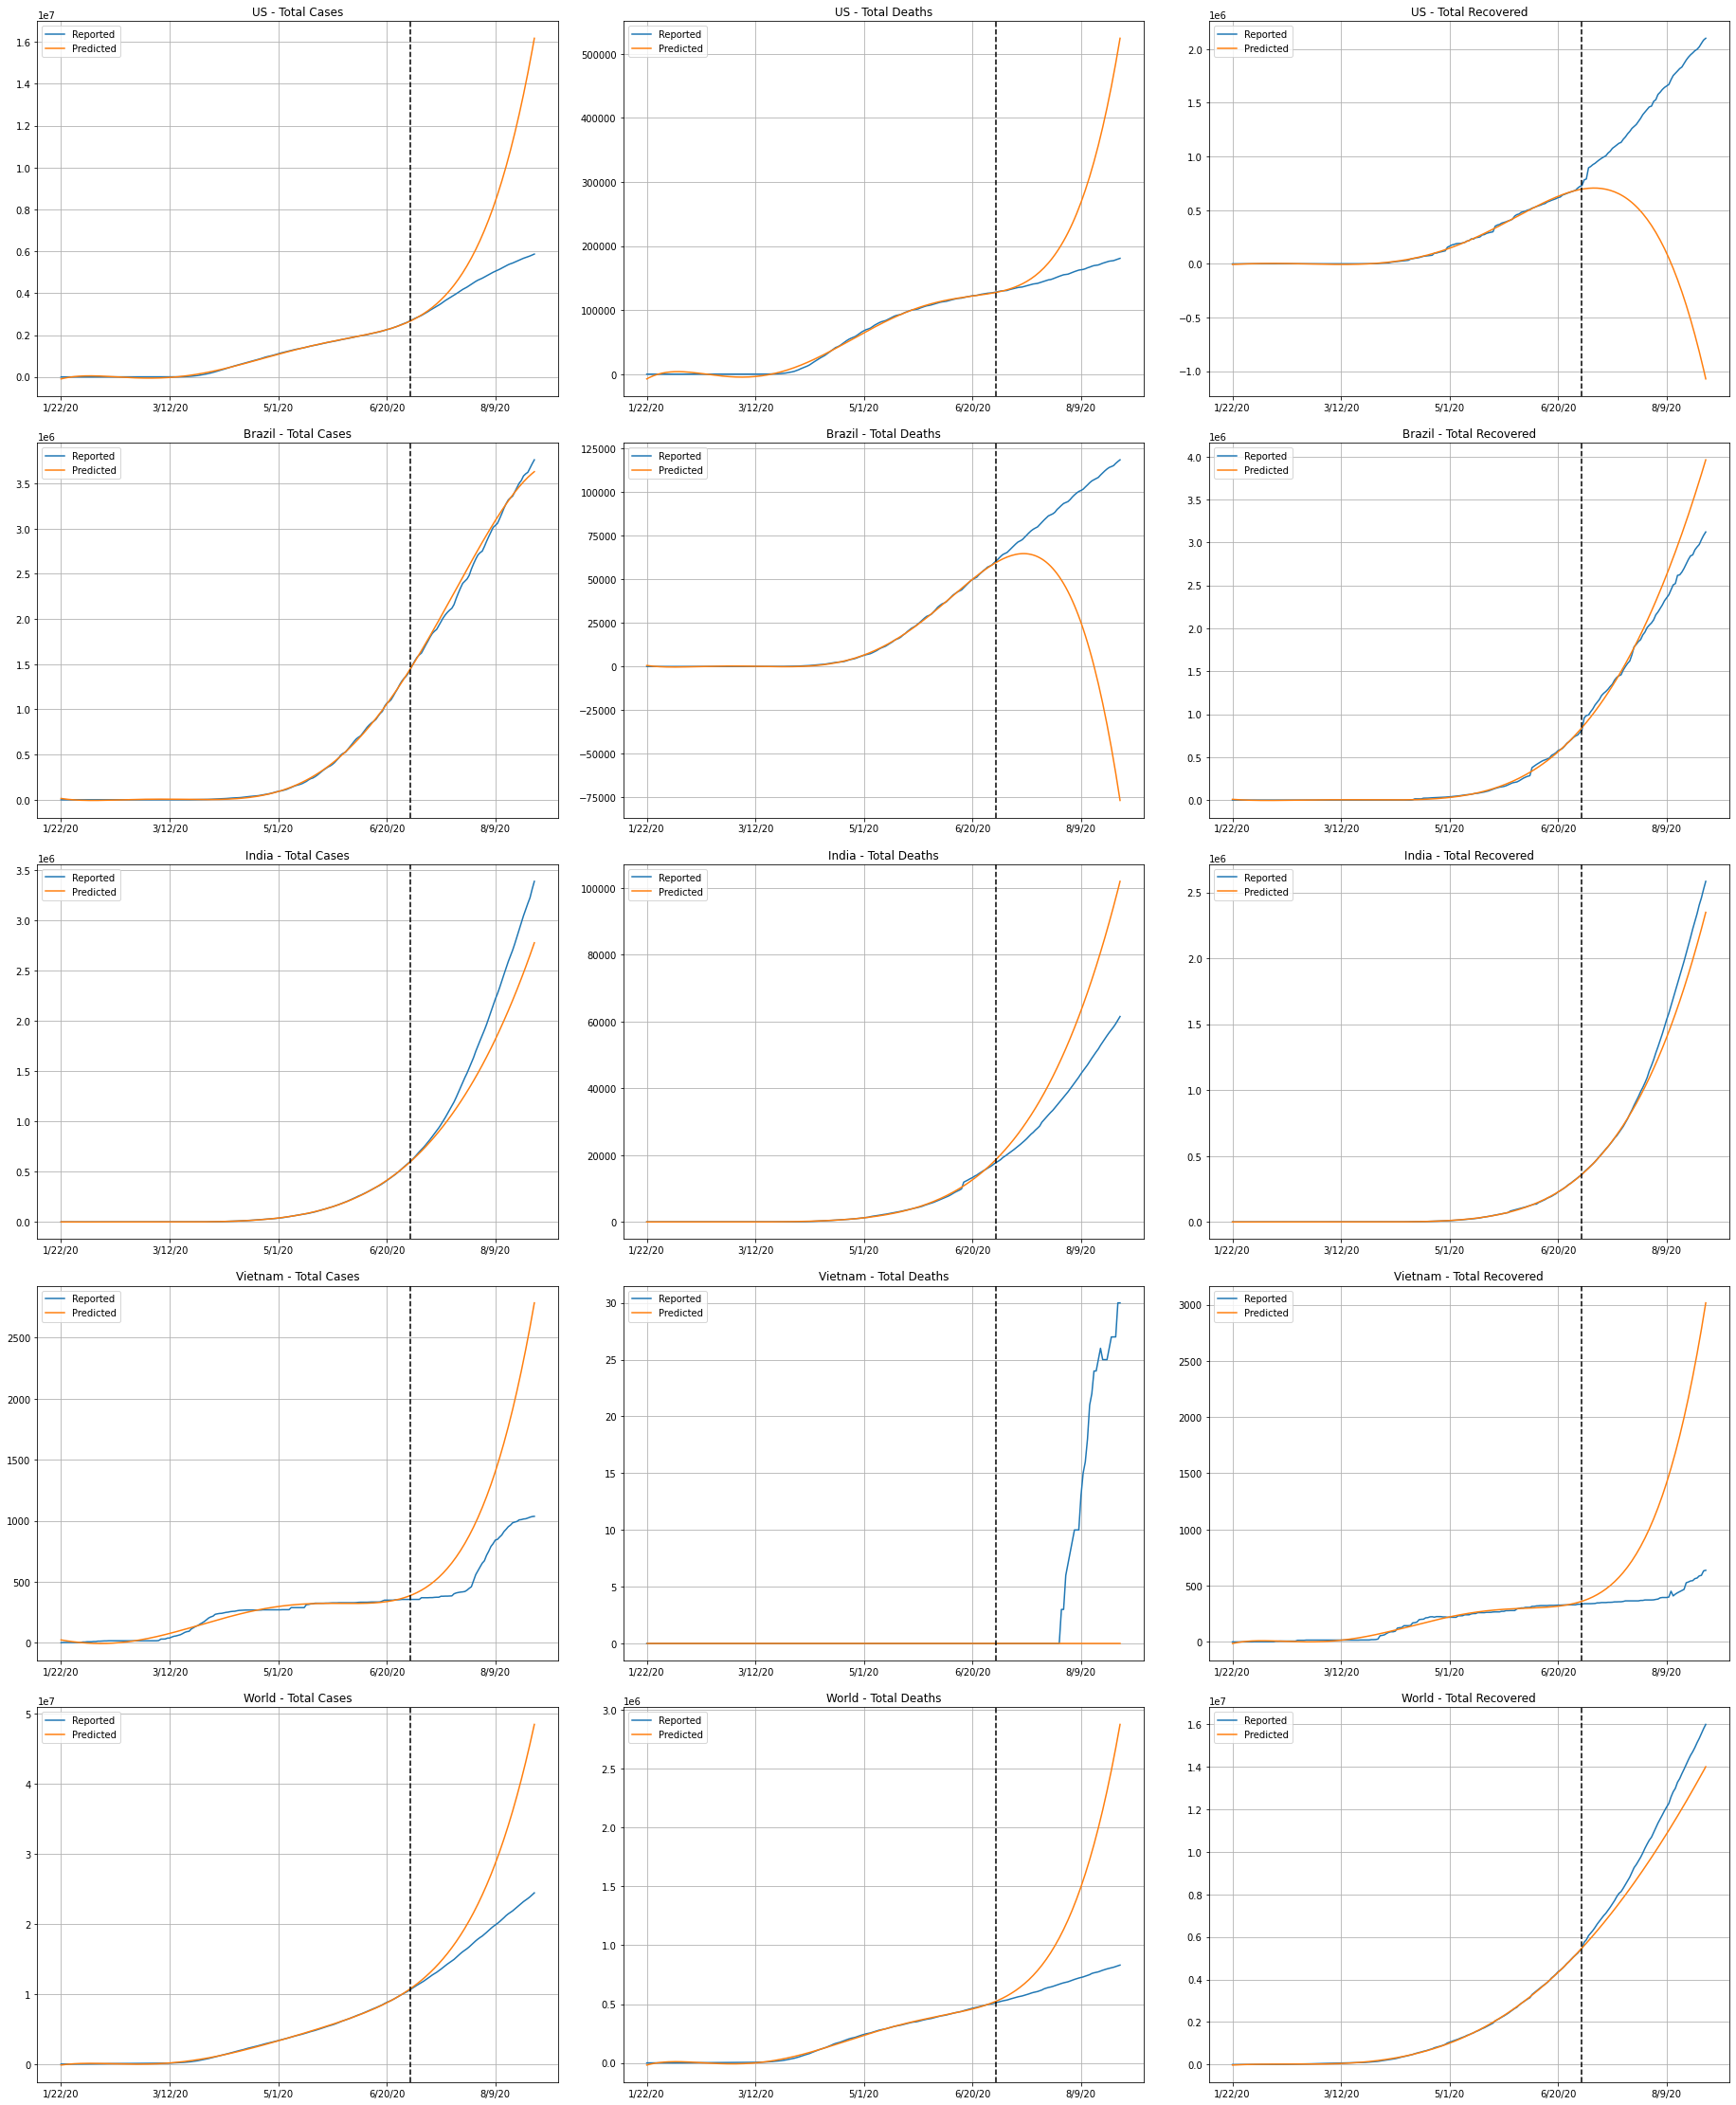

In [61]:
n_rows = len(countries) + 1
fig, axes = plt.subplots(n_rows, 3, figsize=(32, n_rows*8))
plt.subplots_adjust(wspace=.125, hspace=.125)
degree = 5

for row_no, country in enumerate(countries_iw):
  for dfi, dfr in enumerate(dfs):
    cur_ax = axes[row_no, dfi]
    
    serie = dfr[1].loc[row_idx_dict[country][dfi]]
    serie.plot(ax=cur_ax, label='Reported')
    cur_ax.set_title('{} - {}'.format(country, dfr[0]))

    # predictor = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree, include_bias=True)), ("linear_regression", LinearRegression())])
    predictor = make_pipeline(PolynomialFeatures(degree), Ridge())
    predictor.fit(X=X_train, y=serie[:start_day_idx])
    # predict for all days
    prediction = predictor.predict(X=X)
    cur_ax.plot(X, prediction, label='Predicted')
    cur_ax.axvline(x=start_day_idx, ls='--', c='black')

    cur_ax.legend()
    cur_ax.grid(True)
  
  # confirmed = confirmed_data_df.loc[ci[country]]
  # confirmed_predictor = Pipeline([("polynomial_features", PolynomialFeatures(degree=3, include_bias=False)), ("linear_regression", LinearRegression())])
  # confirmed.plot(ax = axes[row_no, 0])
  # axes[row_no, 0].set_title('{} - Total Cases'.format(country))

  # deaths = deaths_data_df.loc[di[country]]
  # deaths_predictor = Pipeline([("polynomial_features", PolynomialFeatures(degree=3, include_bias=False)), ("linear_regression", LinearRegression())])
  # deaths.plot(ax = axes[row_no, 1])
  # axes[row_no, 1].set_title('{} - Total Deaths'.format(country))

  # recovered = recovered_data_df.loc[ri[country]]
  # recovered_predictor = Pipeline([("polynomial_features", PolynomialFeatures(degree=3, include_bias=False)), ("linear_regression", LinearRegression())])
  # recovered.plot(ax = axes[row_no, 2])
  # axes[row_no, 2].set_title('{} - Total Recovered'.format(country))

# confirmed_world.plot(ax = axes[-1, 0])
# deaths_world.plot(ax = axes[-1, 1])
# recovered_world.plot(ax = axes[-1, 2])

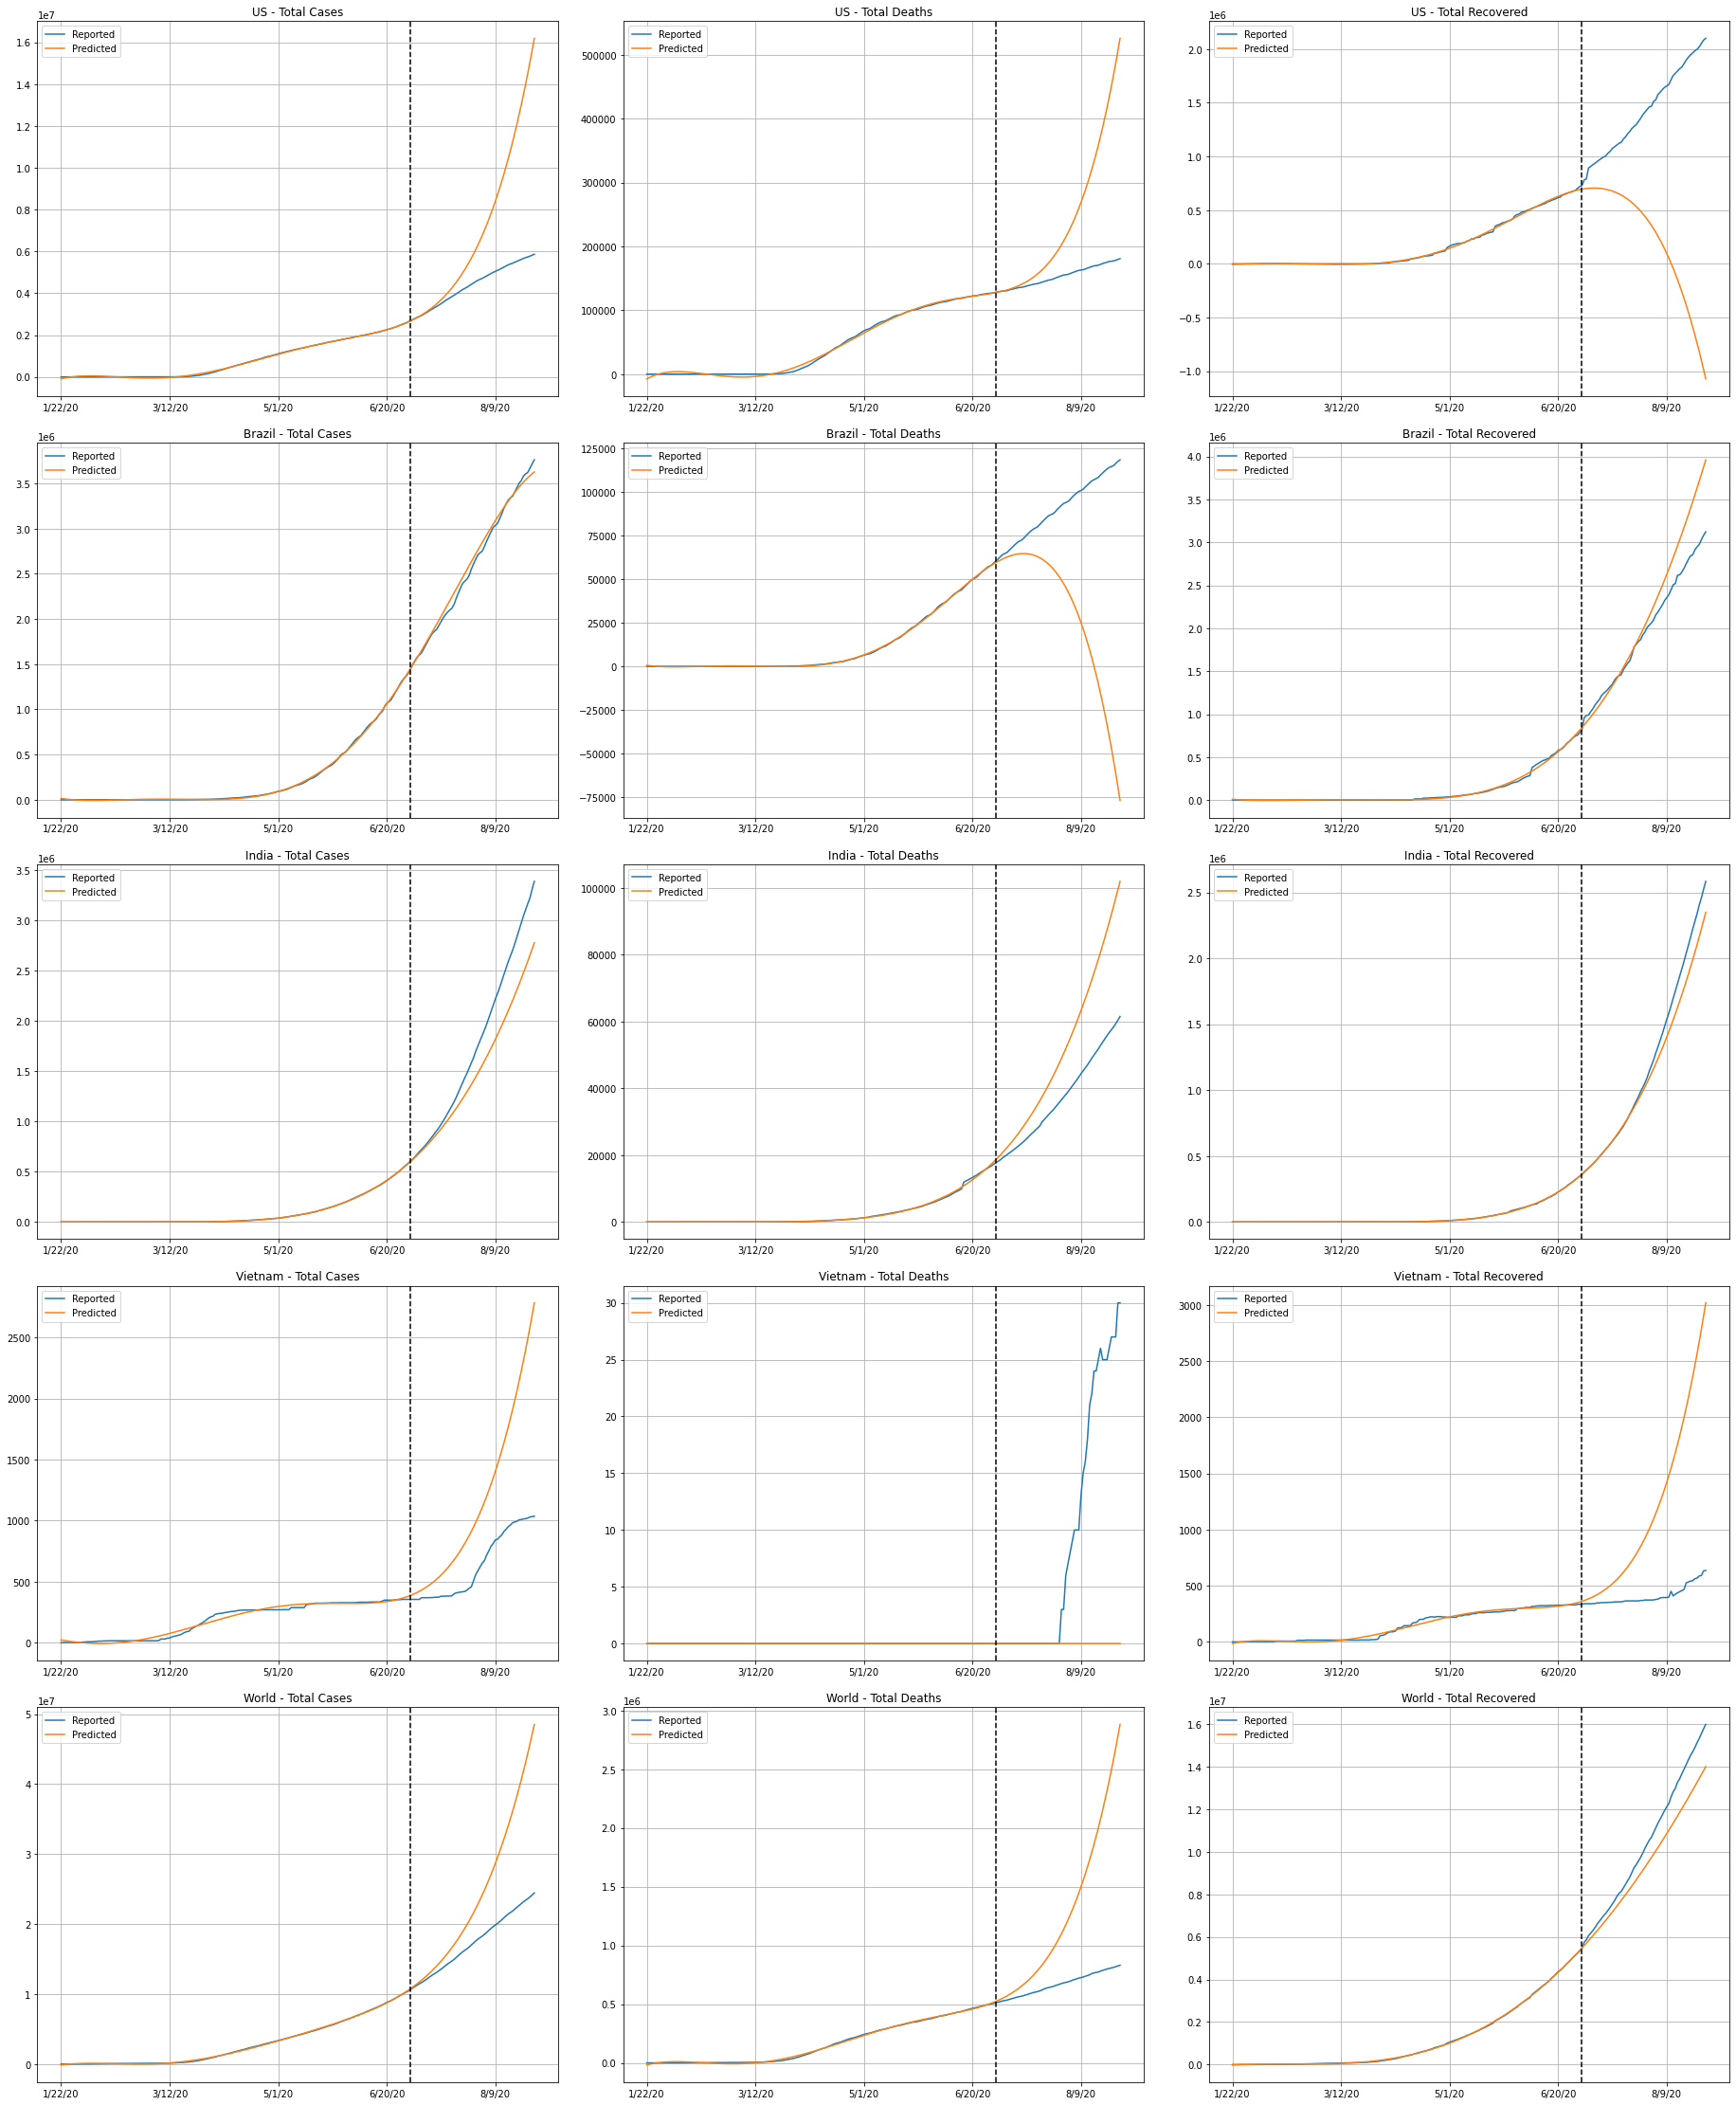

In [62]:
n_rows = len(countries) + 1
fig, axes = plt.subplots(n_rows, 3, figsize=(32, n_rows*8))
plt.subplots_adjust(wspace=.125, hspace=.125)
degree = 5

for row_no, country in enumerate(countries_iw):
  for dfi, dfr in enumerate(dfs):
    cur_ax = axes[row_no, dfi]
    
    serie = dfr[1].loc[row_idx_dict[country][dfi]]
    serie.plot(ax=cur_ax, label='Reported')
    cur_ax.set_title('{} - {}'.format(country, dfr[0]))

    predictor = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree, include_bias=True)), ("linear_regression", LinearRegression())])
    # predictor = make_pipeline(PolynomialFeatures(degree), Ridge())
    predictor.fit(X=X_train, y=serie[:start_day_idx])
    # predict for all days
    prediction = predictor.predict(X=X)
    cur_ax.plot(X, prediction, label='Predicted')
    cur_ax.axvline(x=start_day_idx, ls='--', c='black')

    cur_ax.legend()
    cur_ax.grid(True)